In [1]:
import keggpathx as kp

import pandas as pd

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

#from pymnet import *


In [2]:
org=[['sai','01100'],['tac','01100'],['eco','01040'],['hsa','01040'],['ptr','01040'],['ath','01040'],['mmu','01040'],['cac','01100'],['cel','01040'],['dme','01040'],['lma','01040'],['sce','01040'],['sfx','01040']]

In [3]:
for i in org:
    locals()['G_'+str(i[0])], locals()['NODOS_'+str(i[0])], locals()['EDGES_'+str(i[0])] =kp.net_label(i[0],i[1])   

In [4]:
Tabla=[]   
for i in org:
    Nombre=i[0]
    N_nodos = nx.number_of_nodes(locals()['G_'+str(i[0])])
    N_edges = nx.number_of_edges(locals()['G_'+str(i[0])])
    densidad= 2*N_edges/(N_nodos*(N_nodos-1))
    reciprocidad= nx.reciprocity(locals()['G_'+str(i[0])])
    asortatividad= nx.degree_assortativity_coefficient(locals()['G_'+str(i[0])])
    grado_promedio=N_edges/N_nodos
    inter_grupo=kp.group_betweenness(locals()['G_'+str(i[0])])
    cerc_grupo=kp.group_cerc(locals()['G_'+str(i[0])])
    transitividad=nx.transitivity(locals()['G_'+str(i[0])])
    cluster_promedio=nx.average_clustering(locals()['G_'+str(i[0])].to_undirected(), nodes=None)    
    
    Tabla.append([Nombre, 
                  N_nodos,
                  N_edges,
                  grado_promedio,
                  densidad,
                  reciprocidad,
                  asortatividad,
                  inter_grupo,
                  cerc_grupo,
                  transitividad,
                  cluster_promedio])
        
    
df=pd.DataFrame(Tabla,columns=['Nombre',
                               'N_nodos',
                               'N_edges',
                               'grado_promedio',
                               'densidad',
                               'reciprocidad',
                               'asortatividad',
                               'inter_grupo',
                               'cerc_grupo',
                               'transitividad',
                               'cluster_promedio'])

df.sort_values(by='grado_promedio', ascending=False)

Nombre  N_nodos  N_edges  grado_promedio  densidad  reciprocidad  \
3     hsa      803     3066        3.818182  0.009522      0.270059   
4     ptr      811     3059        3.771887  0.009313      0.264139   
6     mmu      796     2953        3.709799  0.009333      0.263461   
8     cel      483     1373        2.842650  0.011795      0.268026   
9     dme      522     1437        2.752874  0.010568      0.268615   
2     eco      682     1811        2.655425  0.007799      0.192159   
5     ath      787     2069        2.628971  0.006689      0.245529   
12    sfx      610     1547        2.536066  0.008329      0.188752   
11    sce      495     1253        2.531313  0.010248      0.252195   
7     cac      414      877        2.118357  0.010258      0.216648   
10    lma      288      592        2.055556  0.014324      0.250000   
1     tac      240      471        1.962500  0.016423      0.280255   
0     sai      276      485        1.757246  0.012780      0.247423   

    asortatividad  inter_grupo  cerc_grupo  transitividad  cluster_promedio  
3        0.240585     0.080188    0.159407       0.274731          0.427219  
4        0.239629     0.082719    0.159345       0.278135          0.431662  
6        0.209955     0.084099    0.156519       0.275359          0.423773  
8        0.267403     0.067334    0.162839       0.261595          0.350546  
9        0.237661     0.089915    0.144918       0.239993          0.361672  
2        0.313523     0.083856    0.127802       0.250179          0.343522  
5        0.262880     0.077624    0.102513       0.263467          0.392950  
12       0.272465     0.066824    0.137226       0.244448          0.323018  
11       0.290489     0.074379    0.127624       0.264965          0.336716  
7        0.359466     0.059443    0.115749       0.236584          0.287451  
10       0.332227     0.085243    0.146302       0.233597          0.280523  
1        0.367196     0.043332    0.139514       0.302694          0.302162  
0        0.327979     0.029347    0.154181       0.212862          0.234575

In [5]:
df.sort_values(by='cluster_promedio', ascending=False)

Nombre  N_nodos  N_edges  grado_promedio  densidad  reciprocidad  \
4     ptr      811     3059        3.771887  0.009313      0.264139   
3     hsa      803     3066        3.818182  0.009522      0.270059   
6     mmu      796     2953        3.709799  0.009333      0.263461   
5     ath      787     2069        2.628971  0.006689      0.245529   
9     dme      522     1437        2.752874  0.010568      0.268615   
8     cel      483     1373        2.842650  0.011795      0.268026   
2     eco      682     1811        2.655425  0.007799      0.192159   
11    sce      495     1253        2.531313  0.010248      0.252195   
12    sfx      610     1547        2.536066  0.008329      0.188752   
1     tac      240      471        1.962500  0.016423      0.280255   
7     cac      414      877        2.118357  0.010258      0.216648   
10    lma      288      592        2.055556  0.014324      0.250000   
0     sai      276      485        1.757246  0.012780      0.247423   

    asortatividad  inter_grupo  cerc_grupo  transitividad  cluster_promedio  
4        0.239629     0.082719    0.159345       0.278135          0.431662  
3        0.240585     0.080188    0.159407       0.274731          0.427219  
6        0.209955     0.084099    0.156519       0.275359          0.423773  
5        0.262880     0.077624    0.102513       0.263467          0.392950  
9        0.237661     0.089915    0.144918       0.239993          0.361672  
8        0.267403     0.067334    0.162839       0.261595          0.350546  
2        0.313523     0.083856    0.127802       0.250179          0.343522  
11       0.290489     0.074379    0.127624       0.264965          0.336716  
12       0.272465     0.066824    0.137226       0.244448          0.323018  
1        0.367196     0.043332    0.139514       0.302694          0.302162  
7        0.359466     0.059443    0.115749       0.236584          0.287451  
10       0.332227     0.085243    0.146302       0.233597          0.280523  
0        0.327979     0.029347    0.154181       0.212862          0.234575

In [8]:
df.sort_values(by='asortatividad', ascending=True)

Nombre  N_nodos  N_edges  grado_promedio  densidad  reciprocidad  \
6     mmu      796     2953        3.709799  0.009333      0.263461   
9     dme      522     1437        2.752874  0.010568      0.268615   
4     ptr      811     3059        3.771887  0.009313      0.264139   
3     hsa      803     3066        3.818182  0.009522      0.270059   
5     ath      787     2069        2.628971  0.006689      0.245529   
8     cel      483     1373        2.842650  0.011795      0.268026   
12    sfx      610     1547        2.536066  0.008329      0.188752   
11    sce      495     1253        2.531313  0.010248      0.252195   
2     eco      682     1811        2.655425  0.007799      0.192159   
0     sai      276      485        1.757246  0.012780      0.247423   
10    lma      288      592        2.055556  0.014324      0.250000   
7     cac      414      877        2.118357  0.010258      0.216648   
1     tac      240      471        1.962500  0.016423      0.280255   

    asortatividad  inter_grupo  cerc_grupo  transitividad  cluster_promedio  
6        0.209955     0.084099    0.156519       0.275359          0.423773  
9        0.237661     0.089915    0.144918       0.239993          0.361672  
4        0.239629     0.082719    0.159345       0.278135          0.431662  
3        0.240585     0.080188    0.159407       0.274731          0.427219  
5        0.262880     0.077624    0.102513       0.263467          0.392950  
8        0.267403     0.067334    0.162839       0.261595          0.350546  
12       0.272465     0.066824    0.137226       0.244448          0.323018  
11       0.290489     0.074379    0.127624       0.264965          0.336716  
2        0.313523     0.083856    0.127802       0.250179          0.343522  
0        0.327979     0.029347    0.154181       0.212862          0.234575  
10       0.332227     0.085243    0.146302       0.233597          0.280523  
7        0.359466     0.059443    0.115749       0.236584          0.287451  
1        0.367196     0.043332    0.139514       0.302694          0.302162

In [6]:
#for i in org:
#Cluster=nx.triangles(G_eco.to_undirected(), nodes=None)
#df=pd.DataFrame(triangle)
#Cluster= pd.DataFrame([[key, Cluster[key]] for key in Cluster.keys()], columns=['Name', 'Coeff_Clusterin'])
#print(Cluster.sort_values(by='Coeff_Clusterin', ascending=False))

In [7]:
#for i in org:
#Cluster=nx.triangles(G_mmu.to_undirected(), nodes=None)
#df=pd.DataFrame(triangle)
#Cluster= pd.DataFrame([[key, Cluster[key]] for key in Cluster.keys()], columns=['Name', 'Coeff_Clusterin'])
#print(Cluster.sort_values(by='Coeff_Clusterin', ascending=False))

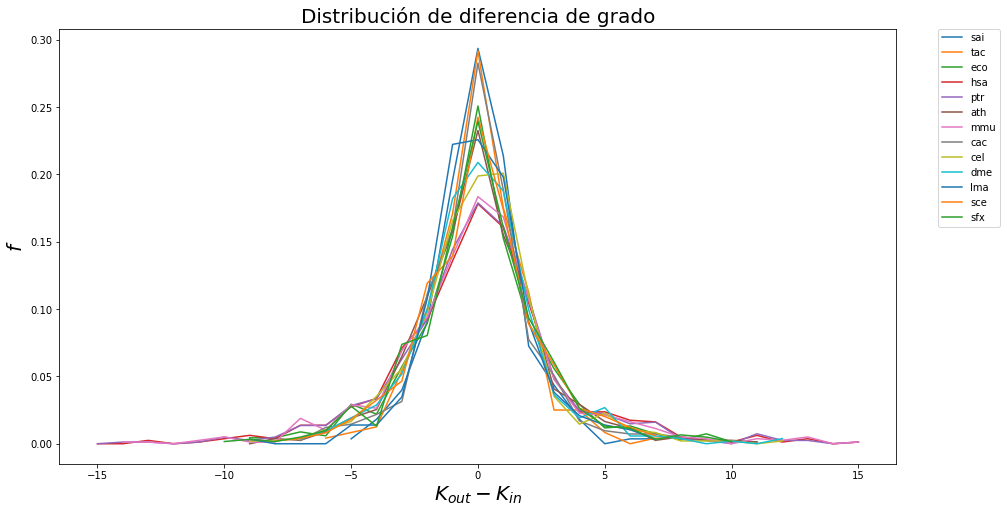

In [57]:
plt.figure(3,figsize=(15,8))
for j in org:
    G=locals()['G_'+str(j[0])]
    nodos=G.nodes

    D=[] #
    d_in=G.in_degree(G)
    d_out=G.out_degree(G)
    for i in nodos: 
        D.append(d_out(i)-d_in[i])
    
    
    P=[]
    X=[]
    for i in range(min(D)+1,max(D)+1):
        P.append(D.count(i)/len(D))
        X.append(i)


    plt.plot(X,P,label= j[0])
    
    

plt.title('Distribución de diferencia de grado',fontsize=20)    
plt.xlabel(r'$K_{out}-K_{in}$',fontsize=20)
plt.ylabel(r'$f$',fontsize=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

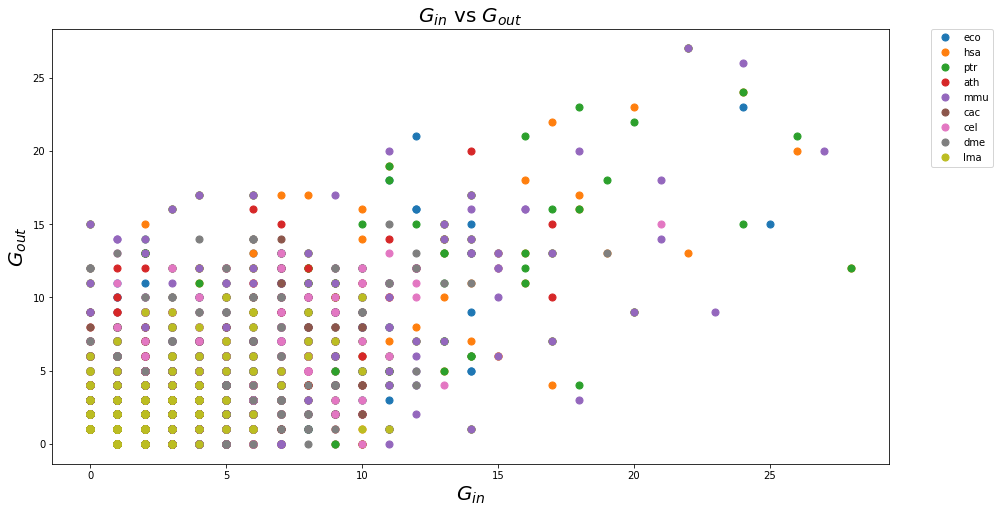

In [23]:
plt.figure(3,figsize=(15,8))
for j in org:
    G=locals()['G_'+str(j[0])]
    nodos=G.nodes

    X=[]
    Y=[]
    d_in=G.in_degree(G)
    d_out=G.out_degree(G)
    for i in nodos: 
        X.append(d_in[i])
        Y.append(d_out(i))
    
    plt.plot(X,Y,'o',label= j[0], markersize=np.sqrt(50)) 


#plt.xscale('log') 
#plt.yscale('log') 
plt.title(r'$G_{in}$ vs $G_{out}$',fontsize=20)    
plt.xlabel(r'$G_{in}$',fontsize=20)
plt.ylabel(r'$G_{out}$',fontsize=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)    
    

<Figure size 1080x576 with 0 Axes>

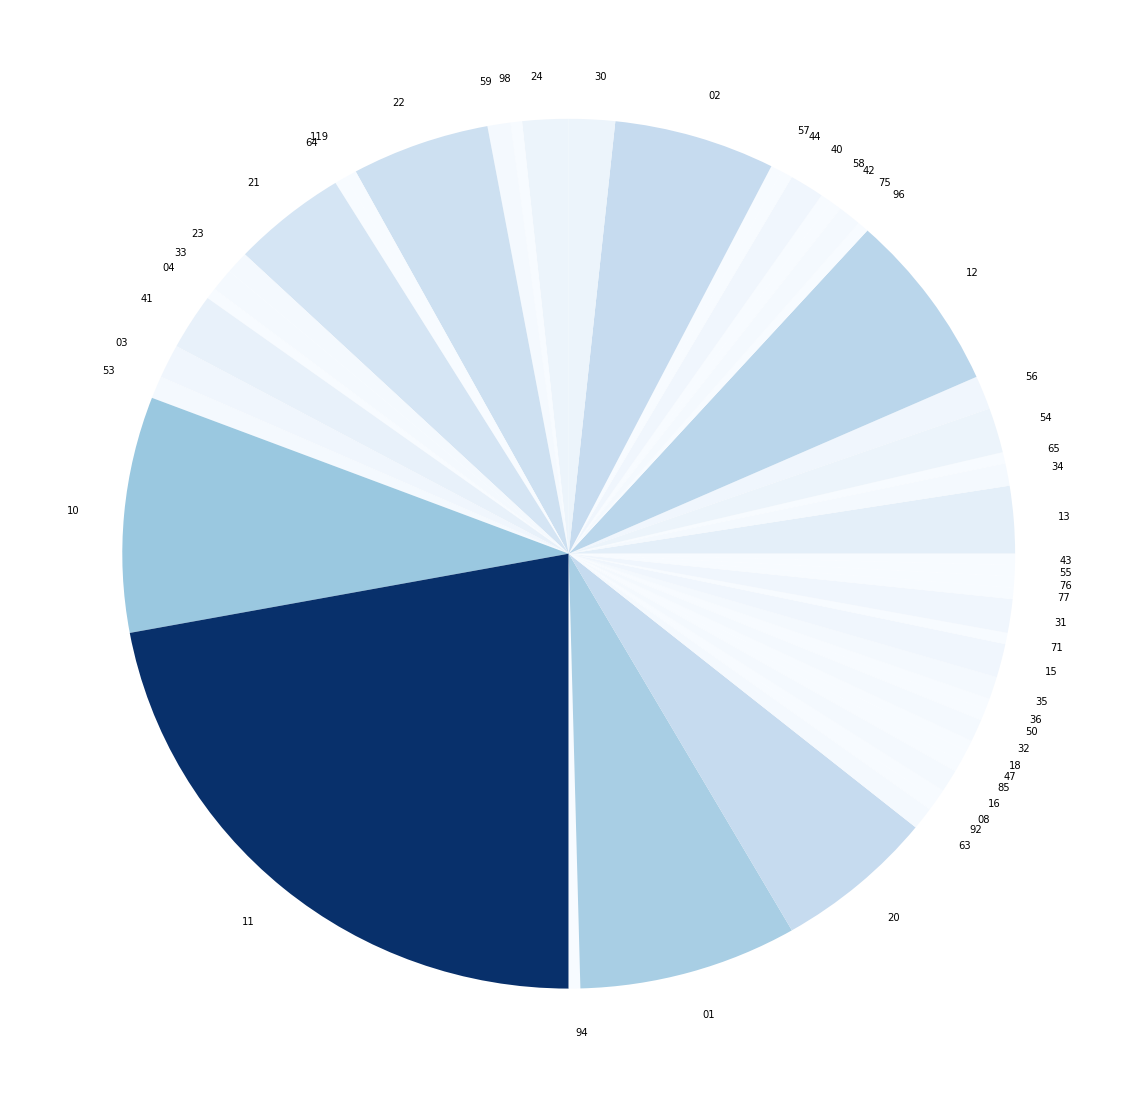

In [58]:
G=G_tac
nodos=G.nodes
size=[]
d_in=G.in_degree(G)
d_out=G.out_degree(G)
size1=[]

for i in nodos:
    size.append(str(d_in[i])+str(d_out(i)))
    size1.append([d_in[i],d_out[i]])
plt.figure(3,figsize=(15,8))


Cont=[]
for n in size1:
    S=size1.count( [n[0],n[1]] )
    Cont.append(S)
    #plt.plot(n[0],n[1],'o', markersize=S, c='g')

#print(Cont)    
df1=pd.DataFrame(Cont)
df2=pd.DataFrame(size)
#print(size)

#df1['n']=size

#size1

#df1

df2['cont']=Cont

df2

TT=df2.drop_duplicates(subset = 0)

TT[0].values
#df2#.drop_duplicates()
#df1#.drop_duplicates()

#vdf2=[]
#for i in df2.values:
#    vdf2.append(i[0])

#pd.DataFrame(vdf2)    
#d1['n']=vdf2



TTT=TT.sort_values(by='cont', ascending=False)

from matplotlib import colors

normdata = colors.Normalize(min(TT['cont'].values), max(TT['cont'].values))
colormap = plt.get_cmap("Blues")
colores =colormap(normdata(TT['cont'].values))


#plt.pie(TT['cont'].values, labels=TT[0].values )#,  autopct="%0.1f %%" , colors=colores)
plt.figure(figsize=(20,20))
plt.pie(TT['cont'].values, labels=TT[0].values , colors=colores)
#plt.pie(TT['cont'].values, labels=TT[0].values , autopct="%0.1f %%" , colors=colores)
#plt.barh(TTT[0].values,TTT['cont'].values)
plt.savefig('tac')
plt.show()



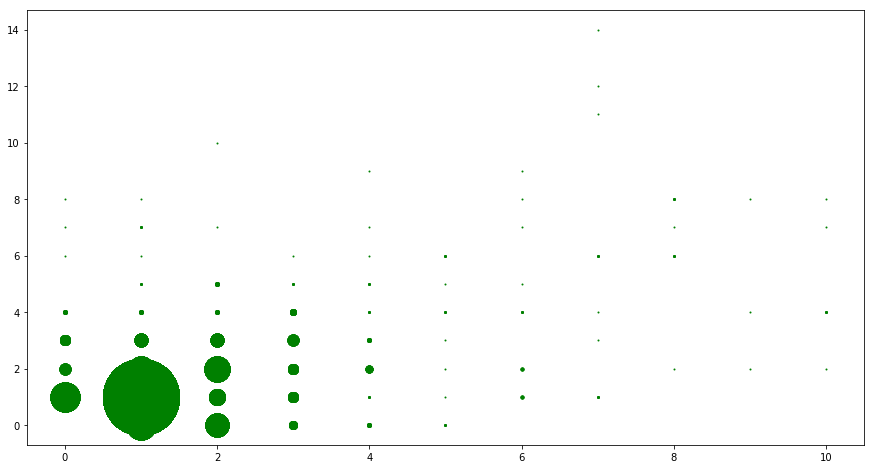

In [38]:
G=G_cac
nodos=G.nodes
size=[]
d_in=G.in_degree(G)
d_out=G.out_degree(G)
for i in nodos:
    size.append([d_in[i],d_out(i)])

plt.figure(3,figsize=(15,8))


for n in size:
    S=size.count([n[0],n[1]])
    plt.plot(n[0],n[1],'o', markersize=S, c='g')

plt.show()

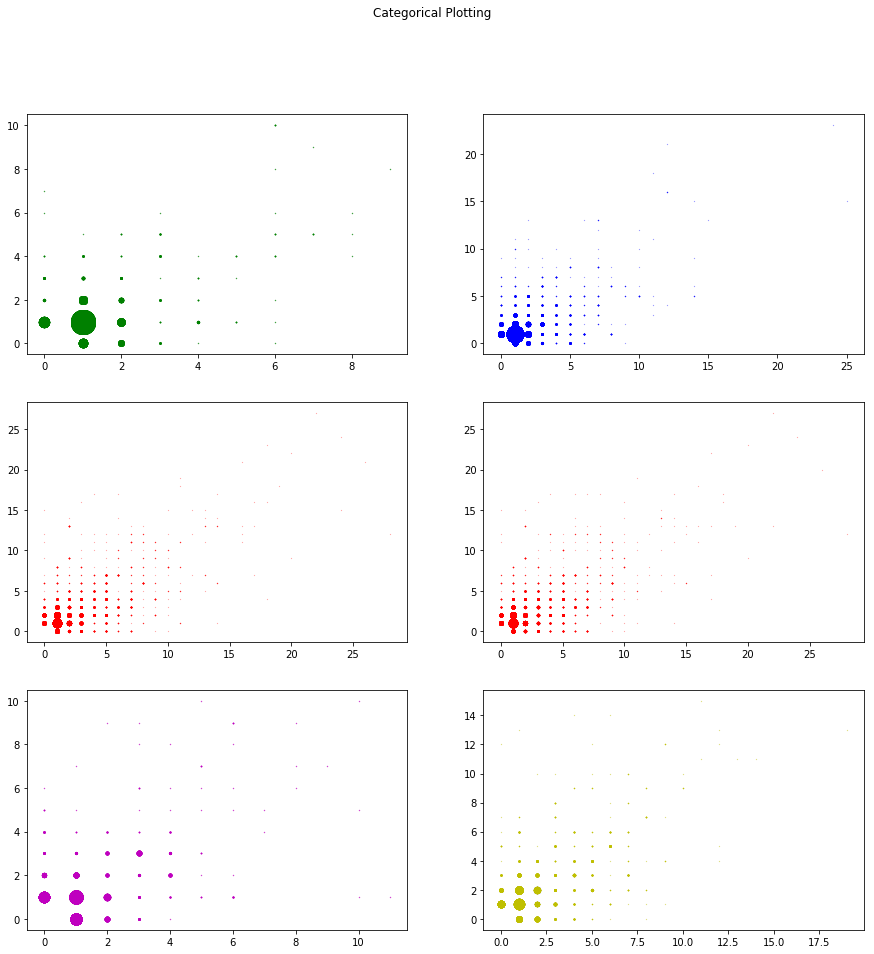

In [66]:
plt.figure(3,figsize=(15,15))

plt.subplot(321)
G=G_sai
nodos=G.nodes
size=[]
d_in=G.in_degree(G)
d_out=G.out_degree(G)
for i in nodos:
    size.append([d_in[i],d_out(i)])
for n in size:
    S=size.count([n[0],n[1]])
    plt.plot(n[0],n[1],'o', markersize=S*100/len(size), c='g')


plt.subplot(322)
G=G_eco
nodos=G.nodes
size=[]
d_in=G.in_degree(G)
d_out=G.out_degree(G)
for i in nodos:
    size.append([d_in[i],d_out(i)])
for n in size:
    S=size.count([n[0],n[1]])
    plt.plot(n[0],n[1],'o', markersize=S*100/len(size), c='b')

    
plt.subplot(323)
G=G_ptr
nodos=G.nodes
size=[]
d_in=G.in_degree(G)
d_out=G.out_degree(G)
for i in nodos:
    size.append([d_in[i],d_out(i)])
for n in size:
    S=size.count([n[0],n[1]])
    plt.plot(n[0],n[1],'o', markersize=S*100/len(size), c='r')

plt.subplot(324)
G=G_hsa
nodos=G.nodes
size=[]
d_in=G.in_degree(G)
d_out=G.out_degree(G)
for i in nodos:
    size.append([d_in[i],d_out(i)])
for n in size:
    S=size.count([n[0],n[1]])
    plt.plot(n[0],n[1],'o', markersize=S*100/len(size), c='r')

    
plt.subplot(325)
G=G_lma
nodos=G.nodes
size=[]
d_in=G.in_degree(G)
d_out=G.out_degree(G)
for i in nodos:
    size.append([d_in[i],d_out(i)])
for n in size:
    S=size.count([n[0],n[1]])
    plt.plot(n[0],n[1],'o', markersize=S*100/len(size), c='m')

        
plt.subplot(326)
G=G_dme
nodos=G.nodes
size=[]
d_in=G.in_degree(G)
d_out=G.out_degree(G)
for i in nodos:
    size.append([d_in[i],d_out(i)])
for n in size:
    S=size.count([n[0],n[1]])
    plt.plot(n[0],n[1],'o', markersize=S*100/len(size), c='y')

            
#plt.subplot(133)
#plt.plot(names, values)
plt.suptitle('Categorical Plotting')
plt.show()


112


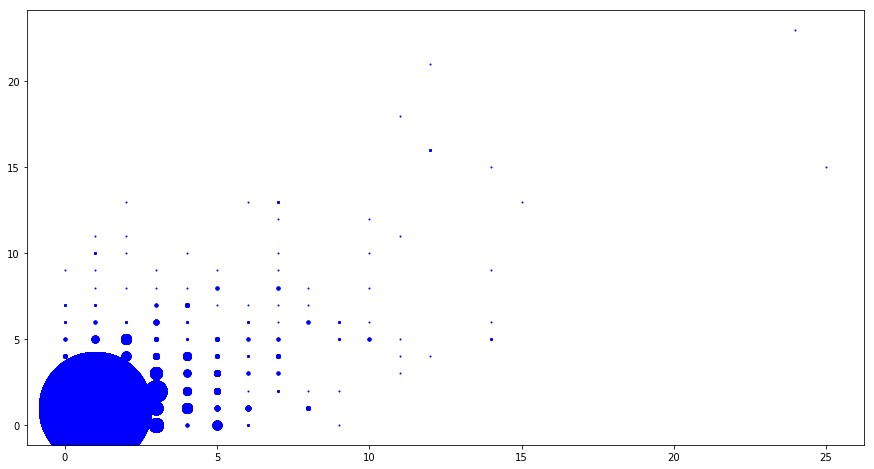

In [37]:
G=G_eco
nodos=G.nodes
X=[]
Y=[]
size=[]
d_in=G.in_degree(G)
d_out=G.out_degree(G)
for i in nodos:
    X.append(d_in[i])
    Y.append(d_out(i))
    size.append([d_in[i],d_out(i)])


print(size.count([1,1]))

plt.figure(3,figsize=(15,8))
for n in size:
    S=size.count([n[0],n[1]])
    plt.plot(n[0],n[1],'o', markersize=S, c='b')

plt.show()

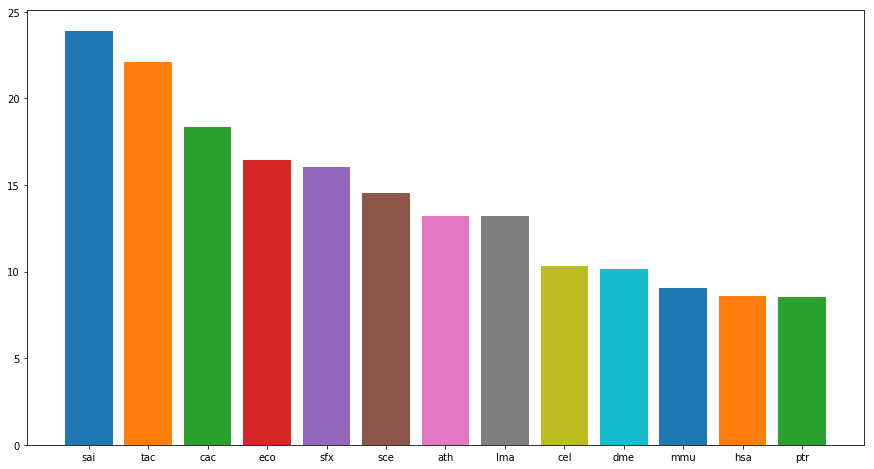

In [6]:
plt.figure(3,figsize=(15,8))
orde=[]
for j in org:
    G=locals()['G_'+str(j[0])]
    nodos=G.nodes
    size=[]
    d_in=G.in_degree(G)
    d_out=G.out_degree(G)
    for i in nodos:
        size.append([d_in[i],d_out(i)])


    prom=size.count([1,1])/len(size)*100
    orde.append([j[0],prom])
    

df=pd.DataFrame(orde)
orde=df.sort_values(by=1, ascending=False)
orde.values

for i in orde.values:
    plt.bar(i[0],i[1])
plt.show()    
        


69
69


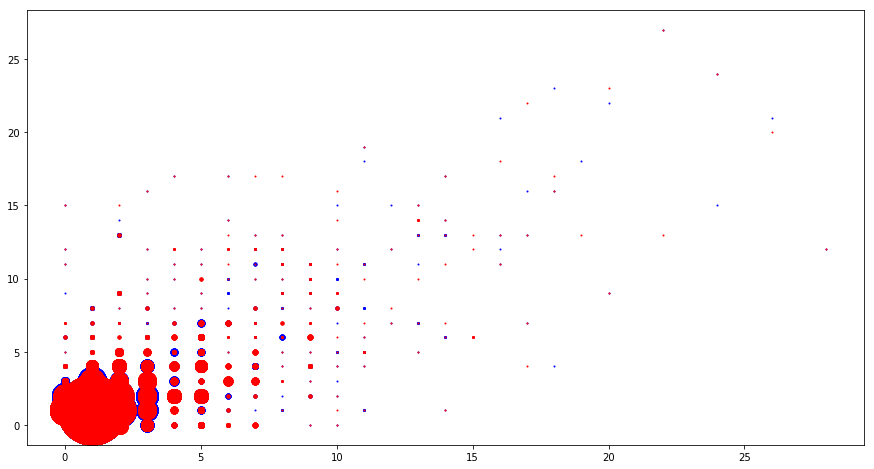

In [54]:



G=G_ptr
nodos=G.nodes
X=[]
Y=[]
size=[]
d_in=G.in_degree(G)
d_out=G.out_degree(G)
for i in nodos:
    X.append(d_in[i])
    Y.append(d_out(i))
    size.append([d_in[i],d_out(i)])


print(size.count([1,1]))

plt.figure(3,figsize=(15,8))
for n in size:
    S=size.count([n[0],n[1]])
    plt.plot(n[0],n[1],'o', markersize=S, c='b')



G=G_hsa
nodos=G.nodes
X=[]
Y=[]
size=[]
d_in=G.in_degree(G)
d_out=G.out_degree(G)
for i in nodos:
    X.append(d_in[i])
    Y.append(d_out(i))
    size.append([d_in[i],d_out(i)])


print(size.count([1,1]))

plt.figure(3,figsize=(15,8))
for n in size:
    S=size.count([n[0],n[1]])
    plt.plot(n[0],n[1],'o', markersize=S, c='r')




    
plt.show()

In [5]:
G=G_ptr

d=G.degree(G) #Vector con el par ordenado de numero de aristas de entrada a cada uno de los nodos
d_in=G.in_degree(G)
d_out=G.out_degree(G)
degre=[]

for i in G.nodes:
    degre.append([i,d[i],d_in[i],d_out[i], d_in[i]-d_out[i] ])
df=pd.DataFrame(degre,columns=['Nombre', 'grado', 'grado_in', 'grado_out','dif_grado'])
ac=df.sort_values(by='dif_grado', ascending=False)
ac[ac['Nombre'] == 'enolase [EC:4.2.1.11]'].index.values[0]
ac['n'] = 1
ac

n=[]
suma=0
for i in range(0,len(ac)):
    suma=1+suma
    n.append(suma)

ac['n']=n 
ac

ac[ac['Nombre'] == 'enolase [EC:4.2.1.11]'].values[0][5]



159

## FUNCION IMPORTANTE (Posicion enzima)

In [6]:
kp.enz_position_dfinout(G_hsa,'enolase [EC:4.2.1.11]')

167

In [5]:
G=G_hsa
d=G.degree(G) #Vector con el par ordenado de numero de aristas de entrada a cada uno de los nodos
d_in=G.in_degree(G)
d_out=G.out_degree(G)
degre=[]

for i in G.nodes:
    degre.append([i,d[i],d_in[i],d_out[i], d_in[i]-d_out[i] ])

df=pd.DataFrame(degre,columns=['Nombre', 'grado', 'grado_in', 'grado_out','dif_grado'])
ac=df.sort_values(by='dif_grado', ascending=False)
#ac[ac['Nombre'] == 'enolase [EC:4.2.1.11]'].index.values[0]
#ac['n'] = 1
    

n=[]
suma=0
for i in range(0,len(ac)):
    suma=1+suma
    n.append(suma)

ac['n']=n 

name_enzima='enolase [EC:4.2.1.11]'
num=ac[ac['Nombre'] == name_enzima ].values[0][5]

print(num)




167


In [18]:
intr=nx.betweenness_centrality(G) #dicionario en python
intr = pd.DataFrame([[key, intr[key]] for key in intr.keys()], columns=['Nombre', 'intermediacion'])
intr=intr.sort_values(by='intermediacion', ascending=False)

n=[]
suma=0
for i in range(0,len(ac)):
    suma=1+suma
    n.append(suma)

intr['n']=n 
num=intr[intr['Nombre'] == name_enzima ].values[0][2]
print(num)

133


In [4]:
kp.enz_position_inter(G_hsa,'enolase [EC:4.2.1.11]')

133

In [5]:
#G = nx.icosahedral_graph()
#node_cut = nx.minimum_node_cut(G_hsa.to_undirected())
#len(node_cut)
#nx.draw(G)

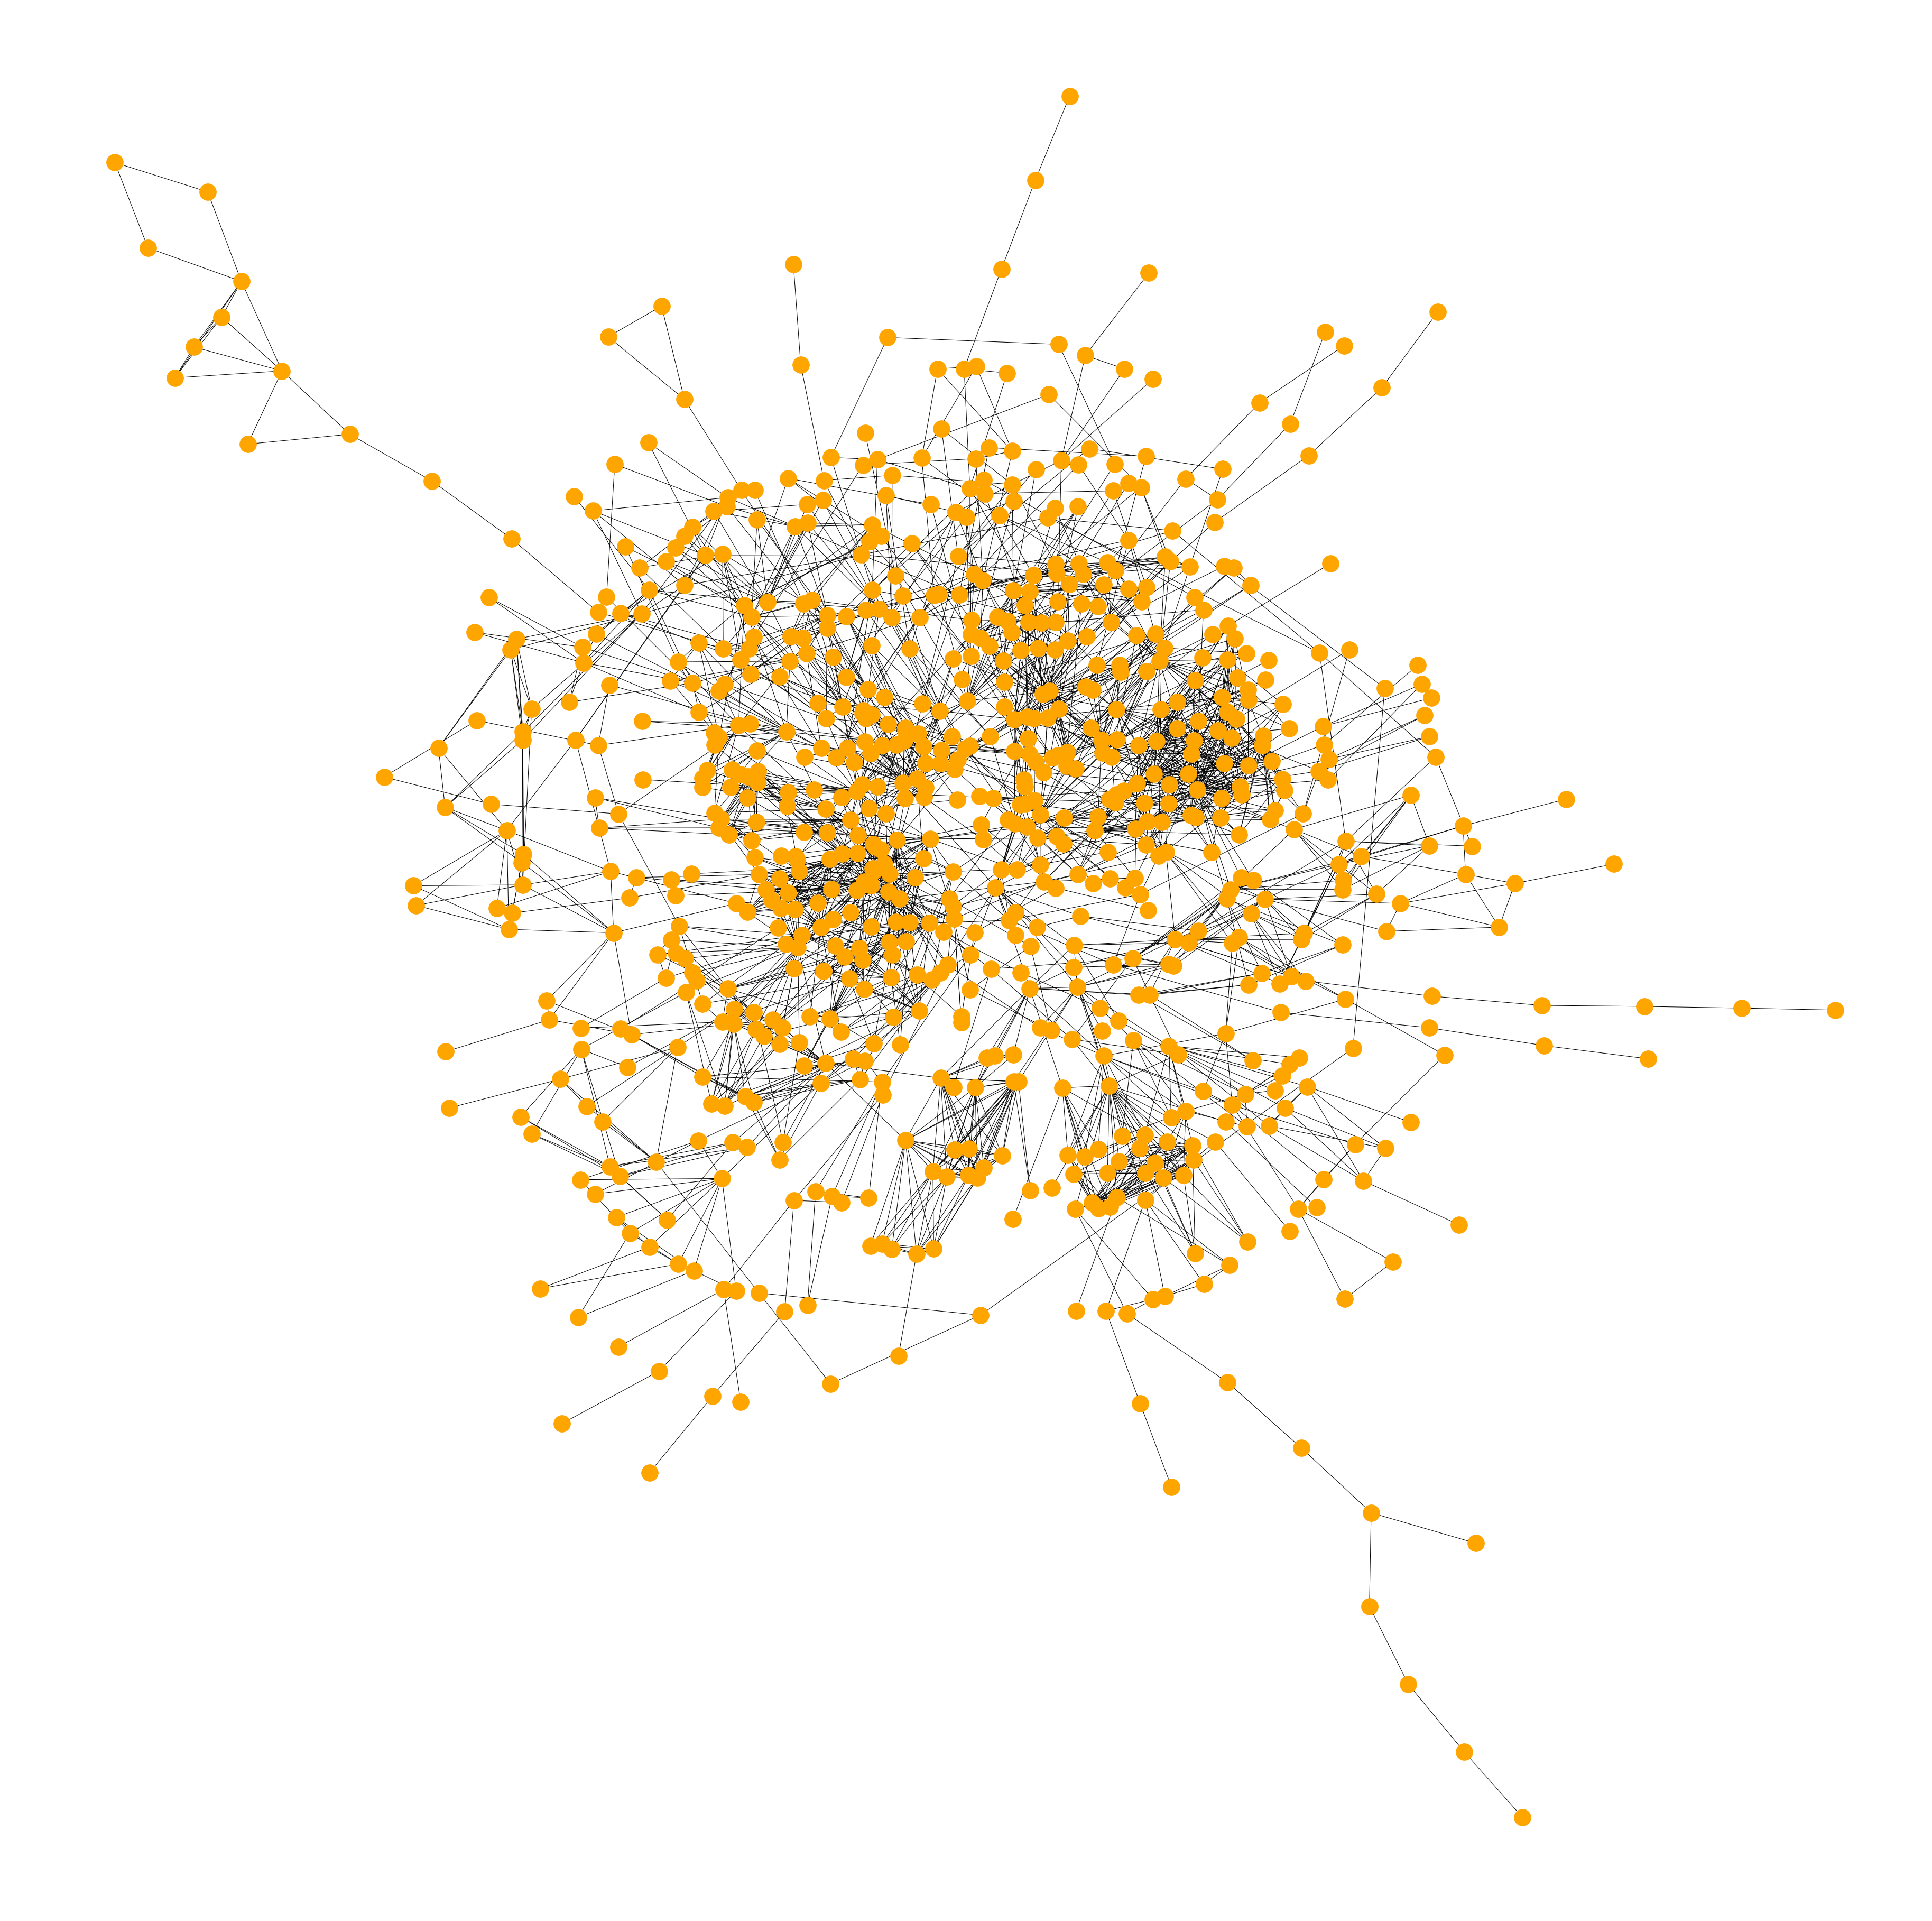

In [51]:
#nx.draw(G_hsa.to_undirected())
plt.figure(3,figsize=(50,50))
nx.draw_kamada_kawai(G_hsa.to_undirected(),font_size=15,node_size=1000,node_color='orange',with_labels=False)

In [72]:
#net = models.er_multilayer(10,2,0.1)
#fig = draw(net)

In [15]:
mnet = MultilayerNetwork(aspects=1)
mnet.add_node(1)
mnet.add_layer('a')

mnet[1,'a'].deg()
mnet[1,2,'a','b'] = 1
mnet[1,'a'][2,'b'] = 1
list(mnet[1,'a'])
#fig = draw(mnet)

[(2, 'b')]

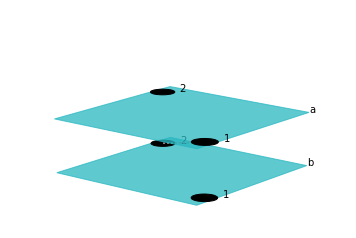

In [20]:
mnet2 = MultilayerNetwork(aspects=2)
mnet2[1,2,'a','b','x','y']=1
mnet2[1,'a','x'][2,'b','y']
mnet2.add_layer('c',1)
mnet2.add_layer('z',2)
fig = draw(mnet)

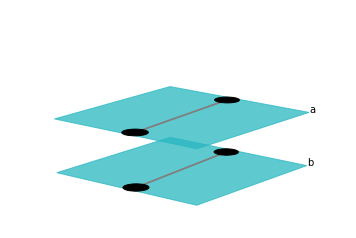

In [87]:
mplex = MultiplexNetwork(couplings="none")
mplex.add_layer('a')
mplex.add_layer('b')
#mnet.add_node(2)
#mplex[1,'a'][2,'a']=1
#mplex.A['a'][1,2]
mplex.A['a'][1,3] = 1
mplex.A['b'][1,3] = 1
fig = draw(mplex, nodeLabelRule = {}, layout = "spring" )

In [6]:
#for i in org:
#    for n in range(0,len(locals()['EDGES_'+str(i[0])])):
#        print([locals()['EDGES_'+str(i[0])][n][0],locals()['EDGES_'+str(i[0])][n][0]])

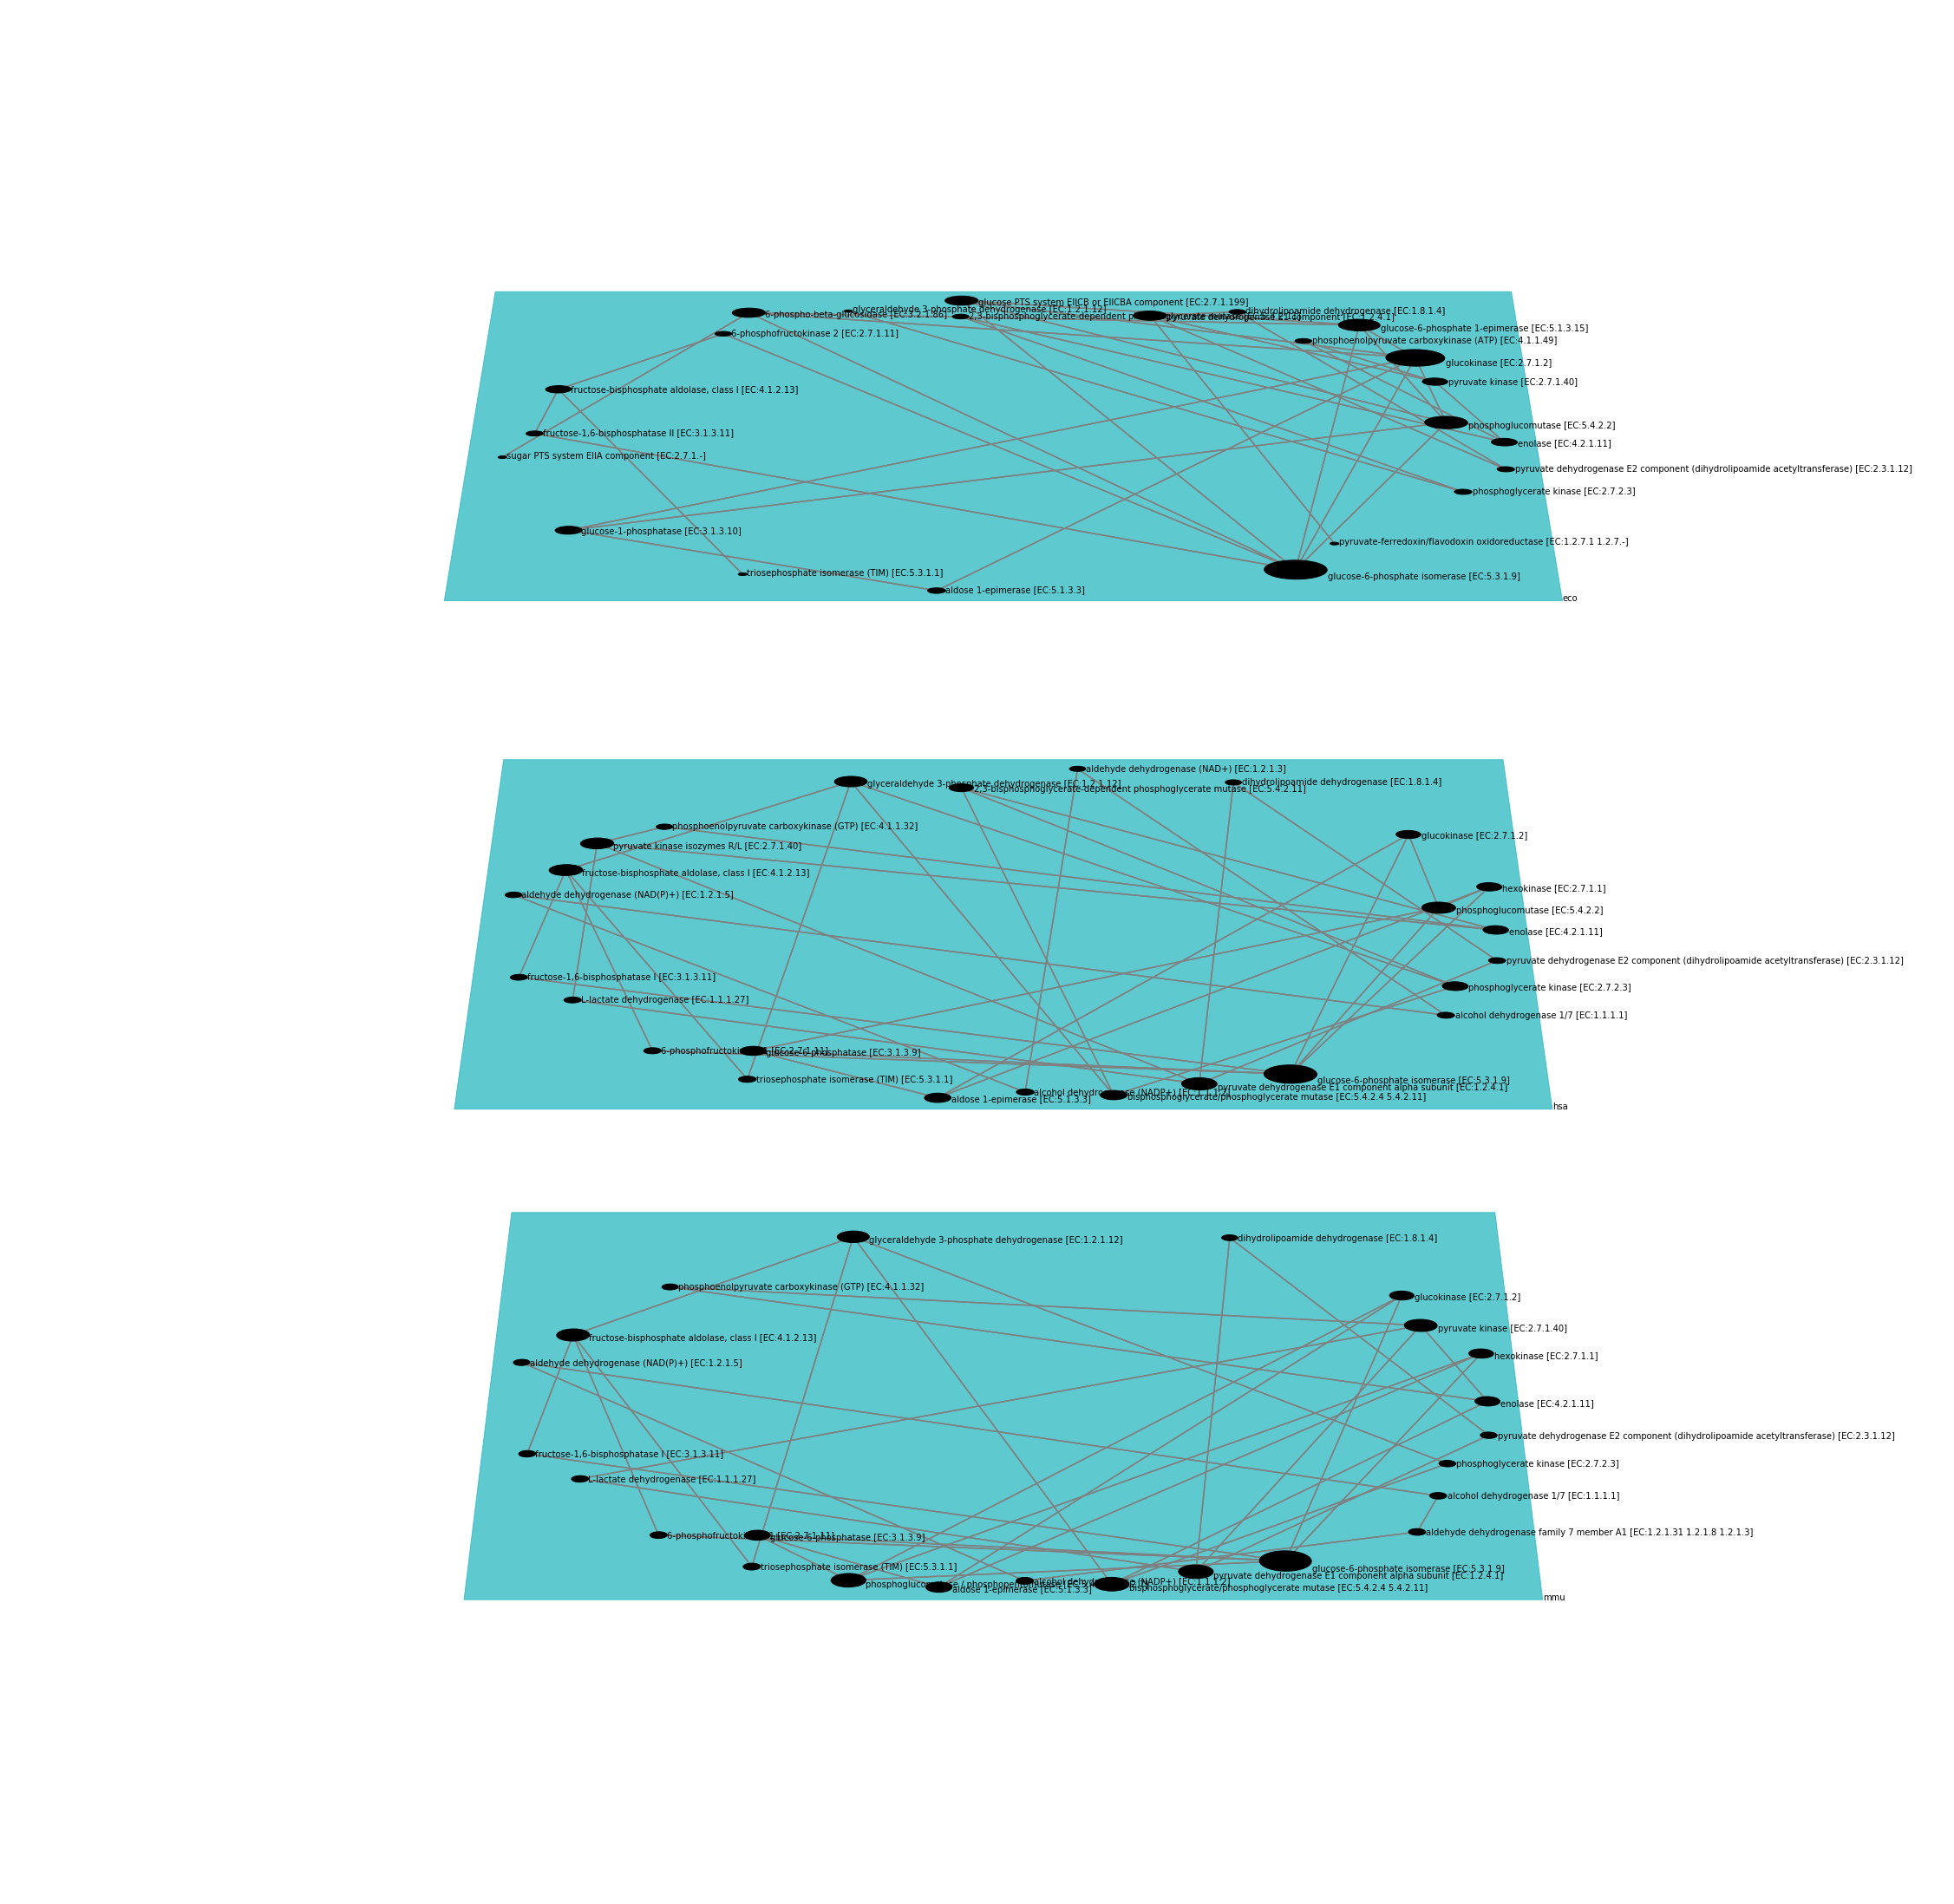

In [24]:
org=[['hsa','01040'],['mmu','01040'] ,['eco','01040']]
pathnet = MultiplexNetwork()

for i in org:
    pathnet.add_layer(i[0])
#    for n in range(0,len(locals()['EDGES_'+str(i[0])])):
    for n in range(0,50):
        pathnet.A[i[0]][locals()['EDGES_'+str(i[0])][n][0],locals()['EDGES_'+str(i[0])][n][1]] = 1
fig = draw(pathnet, show = True,
             layout = "spring", 
             layerColorRule = {}, 
             #defaultLayerColor = "blue", 
             #nodeLabelRule = {},
             figsize = (40,40),
             camera_dist = 10,
             azim = 0,
             elev = 20,
             #layergap = 1, 
             #autoscale = True ,
             #alignedNodes = True,
             nodeSizeRule={"rule":"degree","propscale":0.05}) 
fig.savefig( "net.pdf" )


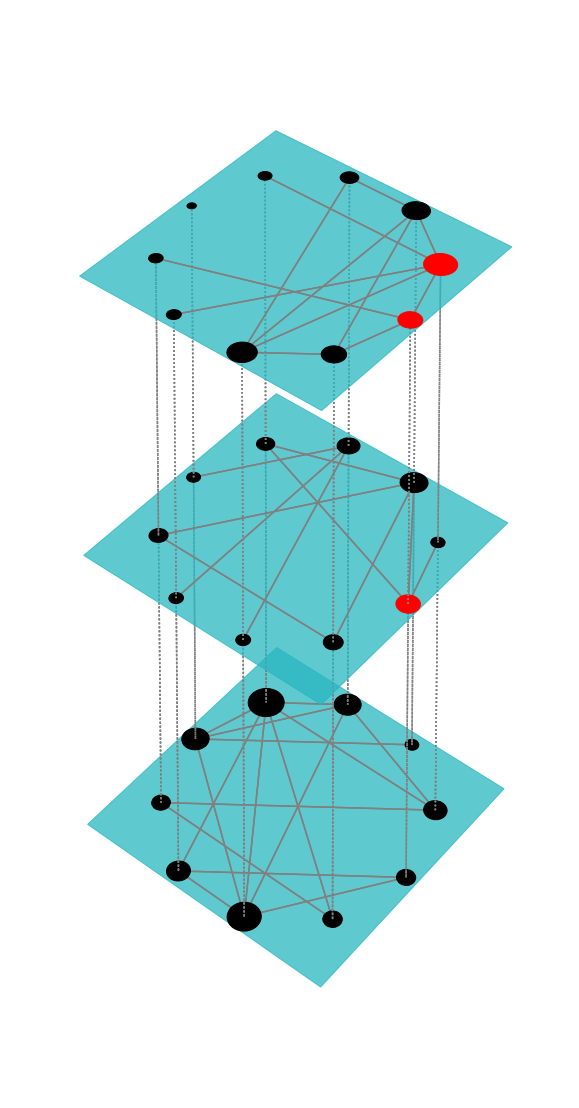

In [22]:
fig=draw(er(10,3*[0.3]),
             layout='shell',
             #layershape="circle",
             nodeColorDict={(0,0):"r",(1,0):"r",(0,1):"r"},
             layerLabelRule={},
             nodeLabelRule={},
             figsize = (10,20),
             nodeSizeRule={"rule":"degree","propscale":0.05})

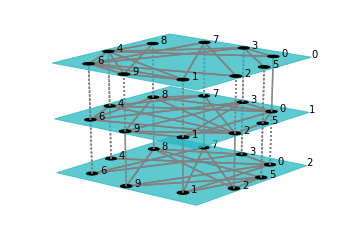

In [9]:
fig = draw ( er ( 10 , 3 * [ 0.4 ]), layout = "spring" )

In [32]:
#G=nx.DiGraph()

#G.add_edge(3,2)
#G.add_edge(2,3)
#G.add_edge(4,3)
#G.add_edge(5,4)
#G.add_edge(5,6)

#nx.draw_kamada_kawai(G,font_size=15,node_size=1000,node_color='orange',with_labels=False)
 
#plt.show()

#nx.reciprocity(G)


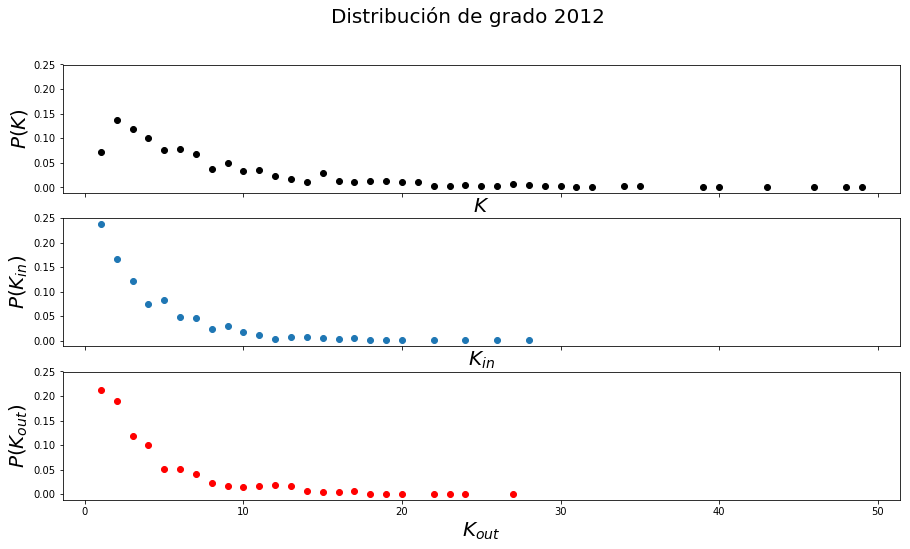

In [55]:
G=G_hsa

nodos=G.nodes

D=[] # un vector donde vamos a colocar el numero de vinvulos de todos los nodos
d=nx.degree(G) # Vector que contiene el par ordenado del nodo y su numero de vinculos
for i in nodos: 
    D.append(d[i])
    

D_in=[] # un vector donde vamos a colocar el numero de vinvulos de todos los nodos
d=G.in_degree(G) # Vector que contiene el par ordenado del nodo y su numero de vinculos
for i in nodos: 
    D_in.append(d[i])
    
    
D_out=[] # un vector donde vamos a colocar el numero de vinvulos de todos los nodos
d=G.out_degree(G) # Vector que contiene el par ordenado del nodo y su numero de vinculos
for i in nodos: 
    D_out.append(d[i])
    
    
P=[]
X=[]
for i in range(1,max(D)+1):
    if D.count(i) != 0: 
        P.append(D.count(i)/len(D))
        X.append(i)

#P=[]
#X=[]
#for i in range(1,max(D)+1):
#    if D.count(i) != 0:
#        suma=0
#        for j in (1,i):
#            suma=D.count(j)+suma
#        P.append(suma/len(D))
#        X.append(i) 
        
        
P_in=[]
X_in=[]
for i in range(1,max(D_in)+1):
    if D_in.count(i) != 0: 
        P_in.append(D_in.count(i)/len(D_in))
        X_in.append(i)  

       
P_out=[]
X_out=[]
for i in range(1,max(D)+1):
    if D_out.count(i) != 0: 
        P_out.append(D_out.count(i)/len(D_out))
        X_out.append(i)
        
        
        
# GRAFICA DE LA PROVAVILIDAD VS EL NUMERO DE GRADO        
fig, axs = plt.subplots( 3 ,sharex = True, sharey = True, figsize=(15,8))

fig.suptitle('Distribución de grado 2012',fontsize=20)
axs[0].plot(X,P,'ko')         
axs[0].set_xlabel(r'$K$',fontsize=20)
axs[0].set_ylabel(r'$P(K)$',fontsize=20)

axs[1].plot(X_in,P_in,'o')         
axs[1].set_xlabel(r'$K_{in}$',fontsize=20)
axs[1].set_ylabel(r'$P(K_{in})$',fontsize=20)

axs[2].plot(X_out,P_out, 'ro')         
axs[2].set_xlabel(r'$K_{out}$',fontsize=20)
axs[2].set_ylabel(r'$P(K_{out})$',fontsize=20)

#plt.savefig("P_vs_k_2012.pdf")# Guardar la red en pdf.    

plt.show()

[0.7621419676214196, 0.5965130759651307, 0.47571606475716066, 0.4009962640099627, 0.3175591531755916, 0.2689912826899128, 0.22166874221668742, 0.19676214196762143, 0.16687422166874222, 0.14819427148194275, 0.136986301369863, 0.1332503113325031, 0.12453300124533007, 0.11581569115815693, 0.11083437110834371, 0.1070983810709838, 0.10211706102117057, 0.09962640099626396, 0.09838107098381066, 0.09589041095890416, 0.09339975093399755, 0.09215442092154424, 0.09090909090909094]


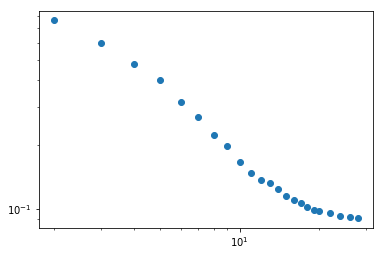

In [38]:
G=G_hsa

nodos=G.nodes

D=[] # un vector donde vamos a colocar el numero de vinvulos de todos los nodos
d=nx.degree(G) # Vector que contiene el par ordenado del nodo y su numero de vinculos
for i in nodos: 
    D.append(d[i])
    

D_in=[] # un vector donde vamos a colocar el numero de vinvulos de todos los nodos
d=G.in_degree(G) # Vector que contiene el par ordenado del nodo y su numero de vinculos
for i in nodos: 
    D_in.append(d[i])
    
    
D_out=[] # un vector donde vamos a colocar el numero de vinvulos de todos los nodos
d=G.out_degree(G) # Vector que contiene el par ordenado del nodo y su numero de vinculos
for i in nodos: 
    D_out.append(d[i])
    
    
#P=[]
#X=[]
#for i in range(1,max(D)+1):
#    if D.count(i) != 0: 
#        P.append(D.count(i)/len(D))
#        X.append(i)

P=[]
X=[]
for i in range(1,max(D)+1):
    if D.count(i) != 0:
        suma=0
        for j in range(1,i):
            suma=D.count(j)+suma
        P.append(1-suma/len(D))
        X.append(i) 

        
## IMPORTANTEEEEEEEEE....        
P_in=[]
X_in=[]
for i in range(2,max(D_in)+1):
    if D_in.count(i) != 0: 
        suma=0
        for j in range(1,i):
            suma=D_in.count(j)+suma
        P_in.append(1-suma/len(D_in))
        X_in.append(i)  

print(P_in)

P_out=[]
X_out=[]
for i in range(1,max(D)+1):
    if D_out.count(i) != 0: 
        suma=0
        for j in range(1,i):
            suma=D_out.count(j)+suma
        P_out.append(1-suma/len(D_out))
        X_out.append(i)
        
        
plt.plot(X_in,P_in,'o')
#plt.plot(X,P,'o')
#plt.plot(X_out,P_out,'o')
plt.xscale('log') 
plt.yscale('log') 
plt.show()

In [37]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score


modelo = linear_model.LinearRegression()
modelo.fit(np.log(X_out), np.log(P_out))

#y_pred = modelo.predict(x)

print(len(np.log(X_in)) )
print(len(np.log(P_in)) )
#plt.plot(np.log(X_in), np.log( P_in),'o')

ValueError: Expected 2D array, got 1D array instead:
array=[0.         0.69314718 1.09861229 1.38629436 1.60943791 1.79175947
 1.94591015 2.07944154 2.19722458 2.30258509 2.39789527 2.48490665
 2.56494936 2.63905733 2.7080502  2.77258872 2.83321334 2.89037176
 2.94443898 2.99573227 3.09104245 3.13549422 3.17805383 3.29583687].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

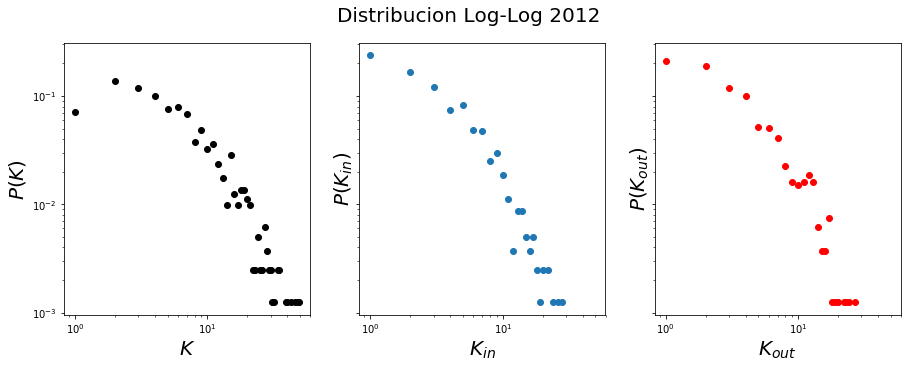

In [35]:

fig, (ax1, ax2 , ax3) = plt.subplots(1, 3 ,sharex = True, sharey = True, figsize=(15,5))
fig.suptitle('Distribucion Log-Log 2012',fontsize=20)
ax1.plot(X,P,'ko')
ax1.set_xlabel(r'$K$',fontsize=20)
ax1.set_ylabel(r'$P(K)$',fontsize=20)

ax2.plot(X_in,P_in,'o')
ax2.set_xlabel(r'$K_{in}$',fontsize=20)
ax2.set_ylabel(r'$P(K_{in})$',fontsize=20)

ax3.plot(X_out,P_out,'ro')
ax3.set_xlabel(r'$K_{out}$',fontsize=20)
ax3.set_ylabel(r'$P(K_{out})$',fontsize=20)

# Escala log-log
plt.xscale('log') 
plt.yscale('log') 

#plt.savefig("Ley_de_potencias_2012.pdf")# Guardar la red en pdf.

plt.show()